In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, rankdata
import matplotlib
import os

In [55]:
data = pd.read_csv("../Baselines/ranks_features.csv")
data.head()

,id,questionage,label,decision_time,topic_reputation_user,topic_reputation_asker,num_words,num_hyperlinks,GunningFogIndex,LIX,...,number_posts_asker,num_questions_asker,number_answers_asker,accepted_answers_asker,question_reputation_asker,answer_reputation_asker,num_solved_questions_asker,reputation_asker,topic_affinity_user,rank
0,144354,0.348912,1,3035100,0,0,110,0,53.769369,141.630631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,69.0
1,144439,0.001620,0,3035100,0,0,86,1,19.057678,49.891386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.0
2,146431,0.006771,0,3035100,0,0,304,0,7.627530,32.530364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,5.0
3,144433,0.011655,0,3035100,0,0,75,0,19.647257,59.244726,...,76.0,6.0,70.0,30.0,23.0,228.0,2.0,6555.0,0.000096,9.0
4,144424,0.042951,0,3035100,0,0,134,0,9.936790,33.483951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,2.0


### Feature importance (copied from output when training and testing RF):

['topic_reputation_asker' 'accepted_answers_asker' 'num_hyperlinks'
 'num_solved_questions_user' 'number_answers_asker'
 'answer_reputation_asker' 'num_questions_user' 'question_reputation_user'
 'num_questions_asker' 'number_posts_asker' 'accepted_answers_user'
 'reputation_user' 'number_answers_user' 'number_posts_user'
 'num_solved_questions_asker' 'answer_reputation_user' 'reputation_asker'
 'question_reputation_asker' 'LIX' 'num_words' 'topic_reputation_user'
 'GunningFogIndex' 'topic_affinity_user' 'cumulative_term_entropy'
 'questionage']
 
 NEW:
 
 ['topic_reputation_asker' 'accepted_answers_asker' 'num_hyperlinks'
 'num_solved_questions_user' 'number_answers_asker'
 'answer_reputation_asker' 'num_questions_user' 'question_reputation_user'
 'num_questions_asker' 'number_posts_asker' 'accepted_answers_user'
 'number_answers_user' 'number_posts_user' 'num_solved_questions_asker'
 'answer_reputation_user' 'question_reputation_asker'
 'topic_reputation_user' 'topic_affinity_user' 'num_words'
 'GunningFogIndex' 'LIX' 'cumulative_term_entropy' 'questionage']
 
 
 --> sorted by importance (questionage most important)

### compare label=1 data to label=0 data

In [56]:
data_neg = data[data["label"]==0]
data_gt = data[data["label"]==1]

In [57]:
print("comparison of ranks")
print("label=0: ", np.mean(data_neg["rank"].values))
print("label=1: ", np.mean(data_gt["rank"].values))

comparison of ranks
label=0:  51.47145725021877
label=1:  22.447300771208226


In [58]:
# print("topic_affinity_asker")
#print(np.mean(data_neg["topic_affinity_asker"].values))
#print(np.mean(data_gt["topic_affinity_asker"].values))

print("topic_affinity_user")
print("label=0: ", np.mean(data_neg["topic_affinity_user"].values))
print("label=1: ", np.mean(data_gt["topic_affinity_user"].values))

topic_affinity_user
label=0:  0.016316644487467113
label=1:  0.02962331032860369


# Analyze the ground truth questions

In [68]:
data_gt = data[data["label"]==1]

### Which features correlate with the rank?

I.e. can we say the higher the rank (=the less accurate the prediction), the higher questionage for example?

In [69]:
corrs = []
cols = np.asarray(data.columns[:-1])
for col in data_gt.columns[:-1]:
    r, _ = pearsonr(data_gt[col], data_gt["rank"])
    # print(col, data_gt[col].values.tolist())
    corrs.append(r)
sorted_corrs = np.flip(np.argsort(np.abs(corrs)))
sorted_cols = cols[sorted_corrs]
sorted_corrs = np.asarray(corrs)[sorted_corrs]
for i in range(len(sorted_corrs)):
    print(sorted_cols[i], sorted_corrs[i])

label nan
topic_affinity_user -0.16066872167218682
num_words 0.10506477084761075
question_reputation_asker -0.0961411687620932
num_solved_questions_asker -0.09481219513890626
num_questions_asker -0.08720345651402171
cumulative_term_entropy 0.07594047720870097
questionage -0.07093185916632047
number_answers_user 0.06752520903447545
accepted_answers_user 0.06669795612827056
number_posts_user 0.060946645944516965
topic_reputation_asker -0.05866539387622049
GunningFogIndex 0.05796344812605472
reputation_asker -0.05671117059238297
reputation_user 0.05160792227786143
LIX 0.05149090579095144
answer_reputation_user 0.05083238095714304
num_solved_questions_user -0.04899774122600931
num_hyperlinks -0.047753173996228915
id -0.03694312325545314
number_posts_asker -0.03331838334410003
num_questions_user -0.030056145133202122
topic_reputation_user -0.023906359948051105
answer_reputation_asker -0.01955646141509142
accepted_answers_asker -0.017286227192828584
number_answers_asker -0.01705593374359366


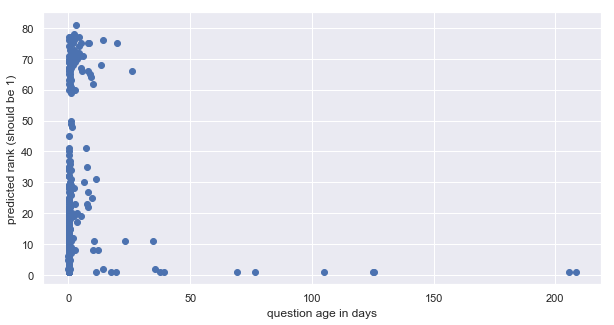

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(data_gt["questionage"], data_gt["rank"])
plt.xlabel("question age in days")
plt.ylabel("predicted rank (should be 1)")
plt.show()

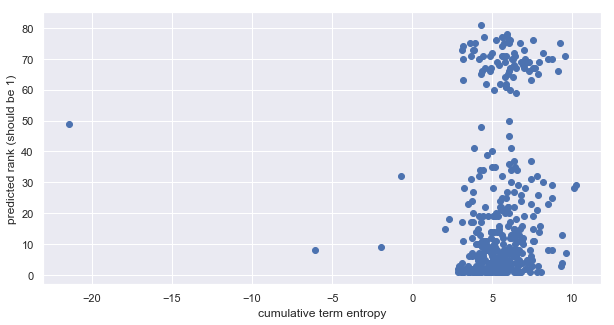

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(data_gt["cumulative_term_entropy"], data_gt["rank"])
plt.xlabel("cumulative term entropy")
plt.ylabel("predicted rank (should be 1)")
plt.show()

### How to the well-predicted examples differ from the ones where prediction did not work?

In [71]:
data_good = data_gt[data_gt["rank"]>10]
data_bad = data_gt[data_gt["rank"]<=10]

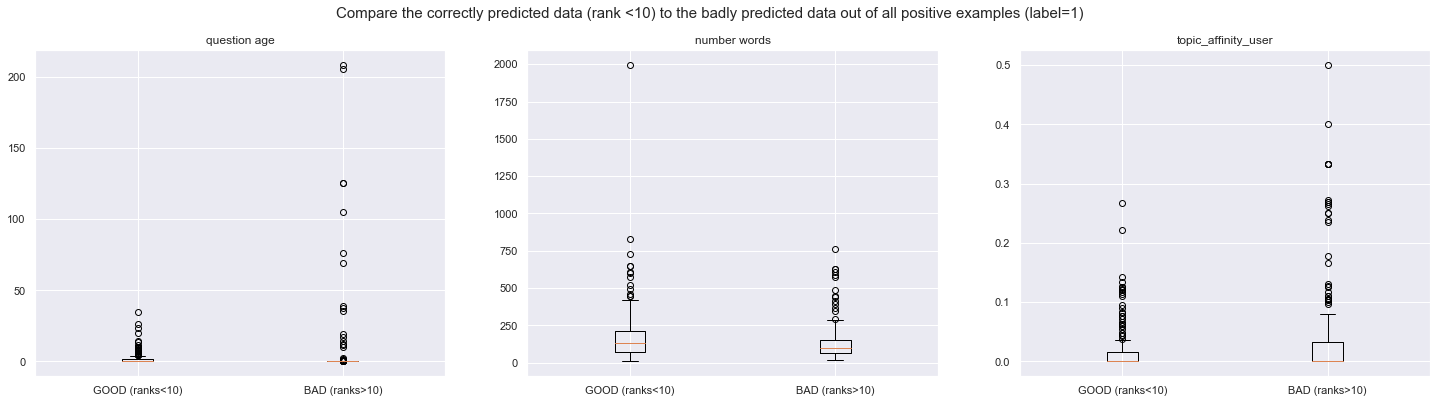

In [73]:
num_plots = 3
plt.figure(figsize=(25,6))
plt.subplot(1,num_plots,1)
plt.boxplot([data_good["questionage"], data_bad["questionage"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("question age")
plt.subplot(1,num_plots,2)
plt.boxplot([data_good["num_words"], data_bad["num_words"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("number words")
plt.subplot(1,num_plots,3)
plt.boxplot([data_good["topic_affinity_user"], data_bad["topic_affinity_user"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
# plt.ylim(0,3000)
plt.title("topic_affinity_user")
plt.suptitle("Compare the correctly predicted data (rank <10) to the badly predicted data out of all positive examples (label=1)", fontsize=15)
plt.savefig("gt_data_boxplots_correctVSwronlyPredicted")
plt.show()

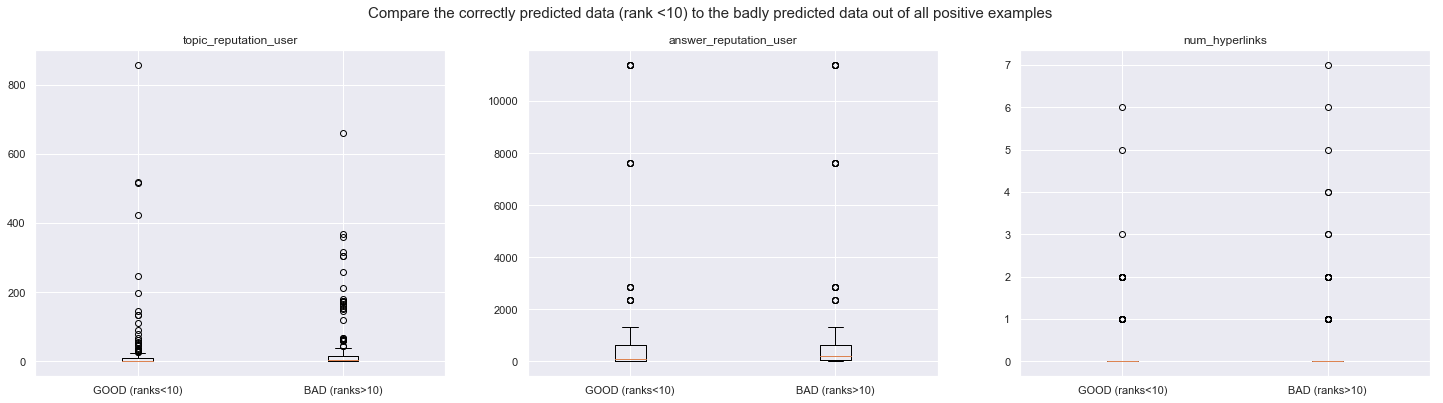

In [72]:
num_plots = 3
plt.figure(figsize=(25,6))
plt.subplot(1,num_plots,1)
plt.boxplot([data_good["topic_reputation_user"], data_bad["topic_reputation_user"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("topic_reputation_user")
plt.subplot(1,num_plots,2)
plt.boxplot([data_good["answer_reputation_user"], data_bad["answer_reputation_user"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("answer_reputation_user")
plt.subplot(1,num_plots,3)
plt.boxplot([data_good["num_hyperlinks"], data_bad["num_hyperlinks"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
# plt.ylim(0,3000)
plt.title("num_hyperlinks")
plt.suptitle("Compare the correctly predicted data (rank <10) to the badly predicted data out of all positive examples", fontsize=15)
plt.show()

In [74]:
for col in data_gt.columns:
    print(col, np.mean(data_good[col])/np.mean(data_bad[col]))

id 0.9879756026249467
questionage 0.35762969138452305
label 1.0
decision_time 1.118949473823012
topic_reputation_user 0.7424606316237667
topic_reputation_asker 0.6324275903254702
num_words 1.2950808817804302
num_hyperlinks 0.9050036258158086
GunningFogIndex 1.0362107850040088
LIX 1.0349175476873838
cumulative_term_entropy 1.0655221393391883
number_posts_user 0.9490594446031672
num_questions_user 0.8100016143208193
number_answers_user 0.9651088532344537
accepted_answers_user 0.9417173982256244
question_reputation_user 0.8463149778320375
answer_reputation_user 0.9363153718107812
num_solved_questions_user 0.7421120732556982
reputation_user 0.9009417325802449
number_posts_asker 2.0247596492245012
num_questions_asker 0.5148755785487976
number_answers_asker 10.370387269719956
accepted_answers_asker 7.998066231568769
question_reputation_asker 0.5795591041458741
answer_reputation_asker 7.458588086472811
num_solved_questions_asker 0.5424944220894999
reputation_asker 1.0825038552706832
topic_aff

# Analyze the questions that were ranked high

Not necessarily the ground truth - what do questions have in common for which the random forest outputs a high rank?

In [75]:
high_preds = data[data["rank"]<10]
low_preds = data[data["rank"]>=10]

In [77]:
for col in data_gt.columns:
    print(col, np.mean(high_preds[col])/np.mean(low_preds[col]))

id 0.9993312994438323
questionage 0.6626793919343091
label 9.653380149785244
decision_time 1.0039341393559047
topic_reputation_user 1.443177683543446
topic_reputation_asker 5.689984236371665
num_words 1.095405840030994
num_hyperlinks 1.1372171726021878
GunningFogIndex 0.979092358989406
LIX 0.9826987350276265
cumulative_term_entropy 0.9320282101431083
number_posts_user 1.009194320865219
num_questions_user 0.9926080402612791
number_answers_user 1.0097745567356835
accepted_answers_user 1.010227589561374
question_reputation_user 1.003664403969381
answer_reputation_user 1.01720406973046
num_solved_questions_user 0.9958249876701326
reputation_user 1.0149881531163525
number_posts_asker 2.413090669928968
num_questions_asker 1.6284208604152859
number_answers_asker 3.0057523825063033
accepted_answers_asker 3.4606327176003204
question_reputation_asker 1.9038334242629011
answer_reputation_asker 3.6812344532938748
num_solved_questions_asker 1.7634505888931604
reputation_asker 2.9978282942285164
top

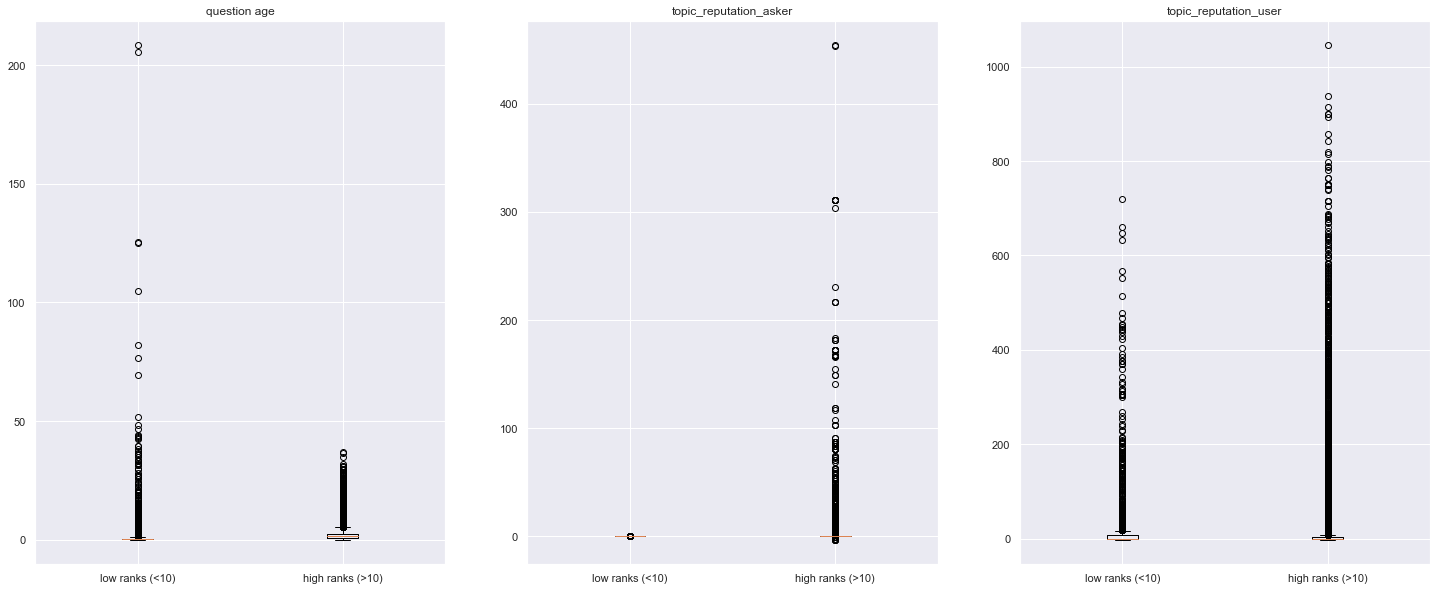

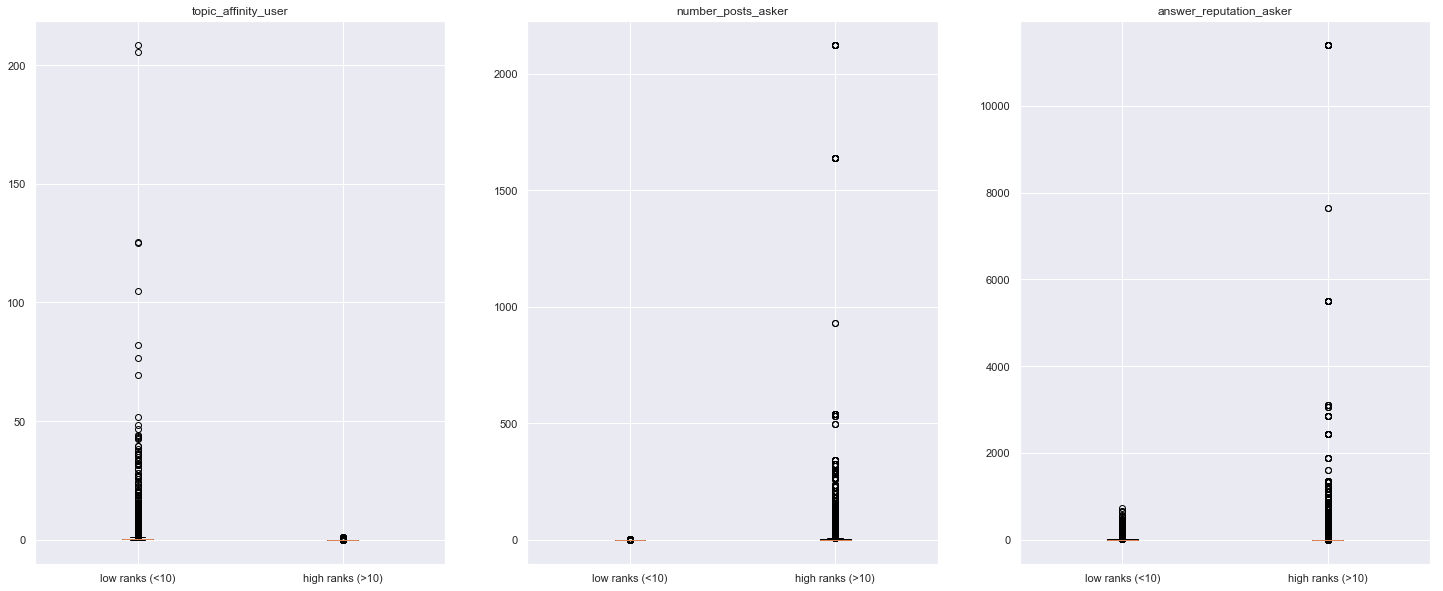

In [85]:
plt.rcParams.update({'font.size': 22})
num_plots = 3
plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([high_preds["questionage"], low_preds["questionage"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("question age")
plt.subplot(1,num_plots,2)
plt.boxplot([high_preds["topic_affinity_user"], low_preds["topic_reputation_asker"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("topic_reputation_asker")
plt.subplot(1,num_plots,3)
plt.boxplot([high_preds["topic_reputation_user"], low_preds["topic_reputation_user"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("topic_reputation_user")
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([high_preds["questionage"], low_preds["topic_affinity_user"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("topic_affinity_user")
plt.subplot(1,num_plots,2)
plt.boxplot([high_preds["topic_affinity_user"], low_preds["number_posts_asker"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("number_posts_asker")
plt.subplot(1,num_plots,3)
plt.boxplot([high_preds["topic_reputation_user"], low_preds["answer_reputation_asker"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("answer_reputation_asker")
plt.show()

In [94]:
print("Comparison of ranks of compared data:")
print("all data, rank <10:", np.mean(high_preds["rank"]))
print("all data, rank >10:", np.mean(low_preds["rank"]))
print("")
print("Comparison of topic affinity (user:")
print("all data, rank <10:", np.mean(high_preds["topic_affinity_user"]))
print("all data, rank >10:", np.mean(low_preds["topic_affinity_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_affinity_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_affinity_user"]))
print("")
print("Comparison of topic reputation (user):")
print("all data, rank <10:", np.mean(high_preds["topic_reputation_user"]))
print("all data, rank >10:", np.mean(low_preds["topic_reputation_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_reputation_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_reputation_user"]))
print("")
print("Comparison of asker reputation (not used as feature itself):")
print("all data, rank <10:", np.mean(high_preds["reputation_asker"]))
print("all data, rank >10:", np.mean(low_preds["reputation_asker"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["reputation_asker"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["reputation_asker"]))
print("INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that discriminates the ground truth from the negative data, because there the difference is not very significant.")
print("")

Comparison of ranks of compared data:
all data, rank <10: 5.0432416087088
all data, rank >10: 55.429819679430096

Comparison of topic affinity (user:
all data, rank <10: 0.028309083790908716
all data, rank >10: 0.0153570857228776
ground truth data (should have low ranks): 0.029623310328603682
negative examples data (should have high ranks): 0.016316644487466586

Comparison of topic reputation (user):
all data, rank <10: 14.530087692772906
all data, rank >10: 10.068121104185218
ground truth data (should have low ranks): 27.645244215938302
negative examples data (should have high ranks): 10.271915375508312

Comparison of asker reputation (not used as feature itself):
all data, rank <10: 1724.7009374055035
all data, rank >10: 575.31678539626
ground truth data (should have low ranks): 738.6940874035989
negative examples data (should have high ranks): 671.5091882431667
INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that discr

### Average value of number of appearances of one question

In [96]:
a, b = np.unique(data_neg["id"].values.tolist(), return_counts=True)
print(np.mean(b))

3.0447457095838883


### Aggregate the negative examples:

### - Compute the average rank per question (proposed to several users) 

### - Compare the ones that were recommended often to the ones that were not recommended often (high ranks)

In [97]:
agg = data_neg.groupby(["id"]).agg({"rank":'mean', 'id':'count'})

In [ ]:
agg

In [99]:
agg_low_rank = agg[agg["rank"]<10]
low_rank_ids = agg_low_rank.index.tolist()
agg_high_rank = agg[agg["rank"]>=10]
high_rank_ids = agg_high_rank.index.tolist()

In [100]:
low_rank_df = data[data["id"].isin(low_rank_ids)]
high_rank_df = data[data["id"].isin(high_rank_ids)]

In [104]:
print("number of low ranked ones (<10):", len(low_rank_ids))
print("number of high ranked ones (>10):", len(high_rank_ids))

number of low ranked ones (<10): 624
number of high ranked ones (>10): 12137


In [105]:
for col in low_rank_df.columns:
    print(col, np.mean(high_rank_df[col])/np.mean(low_rank_df[col]))

id 0.974878323131194
questionage 2.395464445241648
label 0.39226274633013913
decision_time 1.0382476758998689
topic_reputation_user 0.5573479133976842
topic_reputation_asker 0.0651132853311206
num_words 0.7699617054372443
num_hyperlinks 0.7724734446842085
GunningFogIndex 1.0420803708092197
LIX 1.0341204648245932
cumulative_term_entropy 1.2552798719099745
number_posts_user 0.8696054470278668
num_questions_user 0.9389935200658582
number_answers_user 0.8648372808469278
accepted_answers_user 0.8705451047939758
question_reputation_user 0.9394332571290979
answer_reputation_user 0.8388433482267199
num_solved_questions_user 0.924153850892451
reputation_user 0.8664618908129371
number_posts_asker 0.5397163913222722
num_questions_asker 0.7539690273227032
number_answers_asker 0.4527052322781708
accepted_answers_asker 0.41527699488096714
question_reputation_asker 0.614910220041866
answer_reputation_asker 0.36210256047416384
num_solved_questions_asker 0.7171454891269697
reputation_asker 0.2563924561

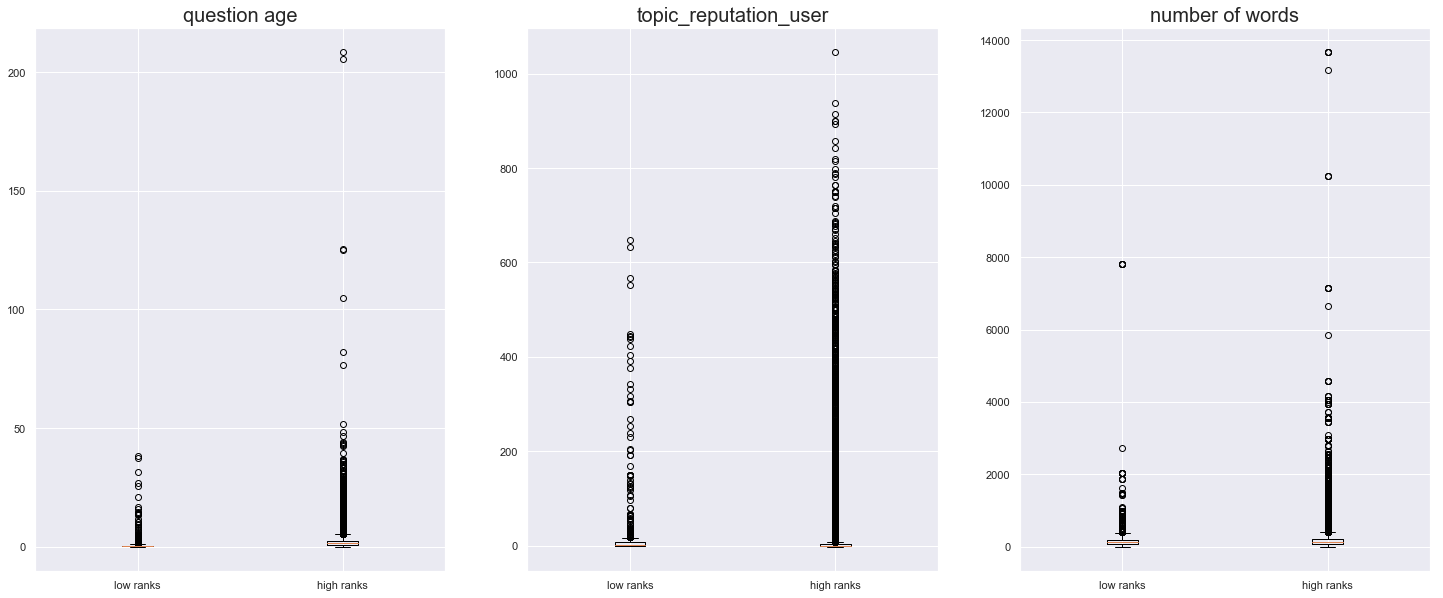

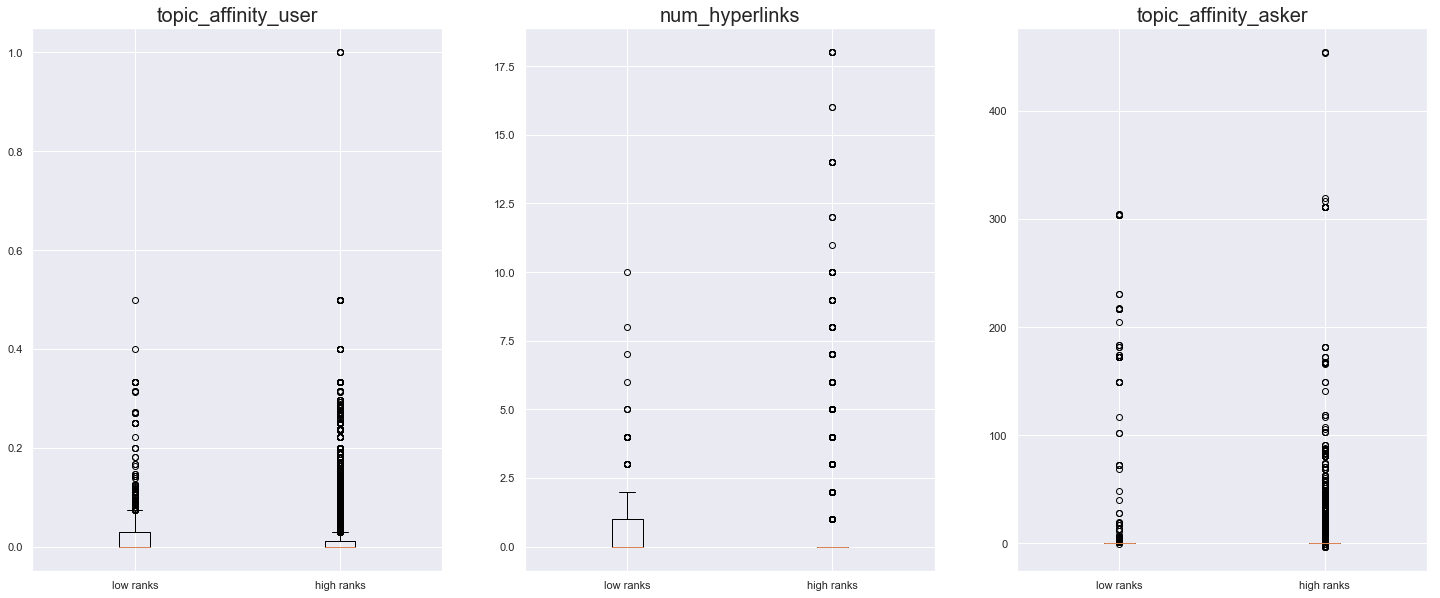

In [108]:
plt.rcParams.update({'font.size': 20})
num_plots = 3
plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([low_rank_df["questionage"], high_rank_df["questionage"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("question age", fontsize=20)
plt.subplot(1,num_plots,2)
plt.boxplot([low_rank_df["topic_reputation_user"], high_rank_df["topic_reputation_user"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("topic_reputation_user", fontsize=20)
plt.subplot(1,num_plots,3)
plt.boxplot([low_rank_df["num_words"], high_rank_df["num_words"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("number of words", fontsize=20)
plt.show()

num_plots = 3
plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([low_rank_df["topic_affinity_user"], high_rank_df["topic_affinity_user"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("topic_affinity_user", fontsize=20)
plt.subplot(1,num_plots,2)
plt.boxplot([low_rank_df["num_hyperlinks"], high_rank_df["num_hyperlinks"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("num_hyperlinks", fontsize=20)
plt.subplot(1,num_plots,3)
plt.boxplot([low_rank_df["topic_reputation_asker"], high_rank_df["topic_reputation_asker"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("topic_affinity_asker", fontsize=20)
plt.show()

In [111]:
print("Comparison of ranks of compared data:")
print("all data, rank <10:", np.mean(low_rank_df["rank"]))
print("all data, rank >10:", np.mean(high_rank_df["rank"]))
print("")
print("Comparison of topic affinity (user:")
print("all data, rank <10:", np.mean(low_rank_df["topic_affinity_user"]))
print("all data, rank >10:", np.mean(high_rank_df["topic_affinity_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_affinity_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_affinity_user"]))
print("")
print("Comparison of topic reputation (user):")
print("all data, rank <10:", np.mean(low_rank_df["topic_reputation_user"]))
print("all data, rank >10:", np.mean(high_rank_df["topic_reputation_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_reputation_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_reputation_user"]))
print("")
print("Comparison of asker reputation (not used as feature itself):")
print("all data, rank <10:", np.mean(low_rank_df["reputation_asker"]))
print("all data, rank >10:", np.mean(high_rank_df["reputation_asker"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["reputation_asker"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["reputation_asker"]))
print("INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that discriminates the ground truth from the negative data, because there the difference is not very significant.")
print("")

Comparison of ranks of compared data:
all data, rank <10: 5.92018244013683
all data, rank >10: 52.376289469550194

Comparison of topic affinity (user:
all data, rank <10: 0.026665539418932804
all data, rank >10: 0.016153153055060453
ground truth data (should have low ranks): 0.029623310328603682
negative examples data (should have high ranks): 0.016316644487466586

Comparison of topic reputation (user):
all data, rank <10: 18.249714937286203
all data, rank >10: 10.171440540399015
ground truth data (should have low ranks): 27.645244215938302
negative examples data (should have high ranks): 10.271915375508312

Comparison of asker reputation (not used as feature itself):
all data, rank <10: 2462.0216647662487
all data, rank >10: 631.243781745824
ground truth data (should have low ranks): 738.6940874035989
negative examples data (should have high ranks): 671.5091882431667
INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that d

### Explore other features of the questions which are not in train dataset but just in database

In [112]:
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import expon

In [113]:
from sqlalchemy import create_engine

postgres_str = ('postgresql://localhost/crossvalidated')
cnx = create_engine(postgres_str)

In [114]:
often_recommended_questions = pd.read_sql_query('''SELECT * FROM Posts WHERE Id IN {};'''.format(tuple(low_rank_ids)), cnx)

In [115]:
often_recommended_questions.head()

,id,posttypeid,acceptedanswerid,parentid,creationdate,score,viewcount,body,owneruserid,lasteditoruserid,...,lasteditdate,lastactivitydate,title,tags,answercount,commentcount,favoritecount,closeddate,communityowneddate,jsonfield
0,131281,1,131337.0,None,2015-01-05 15:34:09.797,39,34159,<p>What would be the approach to use Dynamic T...,54659,29949.0,...,2018-08-23 22:20:24.027,2019-03-25 13:18:40.437,Dynamic Time Warping Clustering,<time-series><clustering>,5,7,56.0,NaT,NaT,None
1,131285,1,131298.0,None,2015-01-05 16:05:29.553,7,1406,<p>i just finished developing an ARMAX model w...,64037,1352.0,...,2016-05-23 10:08:08.550,2016-05-23 10:08:08.550,Review of Box-Jenkins methodology,<time-series><python><arma><methodology><box-j...,1,6,4.0,NaT,NaT,None
2,131286,1,131306.0,None,2015-01-05 16:07:26.117,1,273,"<p>I have a dataset of around 30,000 people wh...",28550,NaN,...,NaT,2015-12-23 16:11:49.470,What software could fit an alternative specifi...,<random-effects-model><software><mlogit>,1,1,NaN,NaT,NaT,None
3,131336,1,NaN,None,2015-01-05 22:22:50.313,3,622,<p>I tried the <code>glmnet</code> package to ...,32397,7290.0,...,2015-01-06 16:31:20.210,2015-01-06 16:31:20.210,Why does this multi-response Guassian LASSO no...,<r><regression><machine-learning><mathematical...,0,4,1.0,NaT,NaT,None
4,131456,1,132530.0,None,2015-01-06 19:40:44.537,5,2864,<p>I'm exploring the effects of removing the i...,6479,42632.0,...,2017-01-01 13:04:26.417,2017-01-01 13:04:26.417,Confused about 0 intercept in logistic regress...,<r><regression><logistic><interpretation><inte...,1,0,1.0,NaT,NaT,None


In [116]:
hardly_recommended_questions = pd.read_sql_query('''SELECT * FROM Posts WHERE Id IN {};'''.format(tuple(high_rank_ids)), cnx)

In [117]:
hardly_recommended_questions.head()

,id,posttypeid,acceptedanswerid,parentid,creationdate,score,viewcount,body,owneruserid,lasteditoruserid,...,lasteditdate,lastactivitydate,title,tags,answercount,commentcount,favoritecount,closeddate,communityowneddate,jsonfield
0,130866,1,NaN,None,2015-01-01 07:19:53.073,1,65,<p>The beautiful indie game Fez has numerous p...,64710,NaN,...,NaT,2015-01-01 07:19:53.073,Confidence in a rank ordering (Fez),<confidence-interval><ranking>,0,1,NaN,NaT,NaT,None
1,130908,1,NaN,None,2015-01-01 20:39:33.663,2,287,<p><strong>Just a quick clarification:</strong...,64734,NaN,...,NaT,2015-01-01 20:39:33.663,Which stats model to predict rank when partici...,<regression><repeated-measures><ranking>,0,3,NaN,NaT,NaT,None
2,130911,1,NaN,None,2015-01-01 21:23:09.430,0,1747,<p>How do you see pair-wise comparisons for ch...,64400,NaN,...,NaT,2015-01-01 21:23:09.430,Pair-wise comparisons for chi square test SPSS?,<spss><chi-squared>,0,4,NaN,NaT,NaT,None
3,130912,1,NaN,None,2015-01-01 21:26:09.987,3,177,<p>I am trying to derive the concentrated log-...,64735,64735.0,...,2015-01-02 16:03:28.327,2015-01-02 16:03:28.327,Deriving the log-likelihood with heteroskedast...,<regression><maximum-likelihood><instrumental-...,0,6,2.0,NaT,NaT,None
4,130926,1,NaN,None,2015-01-02 00:10:42.583,2,798,<p>You can do gibbs sampling from a deep belie...,64745,64745.0,...,2015-01-02 00:49:10.263,2016-01-27 08:15:50.450,Can you sample from an autoencoder?,<deep-learning>,2,2,NaN,NaT,NaT,None


In [118]:
acceptedAnswer = often_recommended_questions["acceptedanswerid"].values
print("Ratio of nans for often_recommended_questions:", sum(np.isnan(acceptedAnswer))/len(acceptedAnswer))
acceptedAnswer = hardly_recommended_questions["acceptedanswerid"].values
print("Ratio of nans for hardly_recommended_questions:", sum(np.isnan(acceptedAnswer))/len(acceptedAnswer))

Ratio of nans for often_recommended_questions: 0.48878205128205127
Ratio of nans for hardly_recommended_questions: 0.8644640355936393


In [119]:
print("Average score of often_recommended_questions:", np.mean(often_recommended_questions["score"].values))
print("Average score of hardly_recommended_questions:", np.mean(hardly_recommended_questions["score"].values))

Average score of often_recommended_questions: 3.34775641025641
Average score of hardly_recommended_questions: 2.4025706517261267


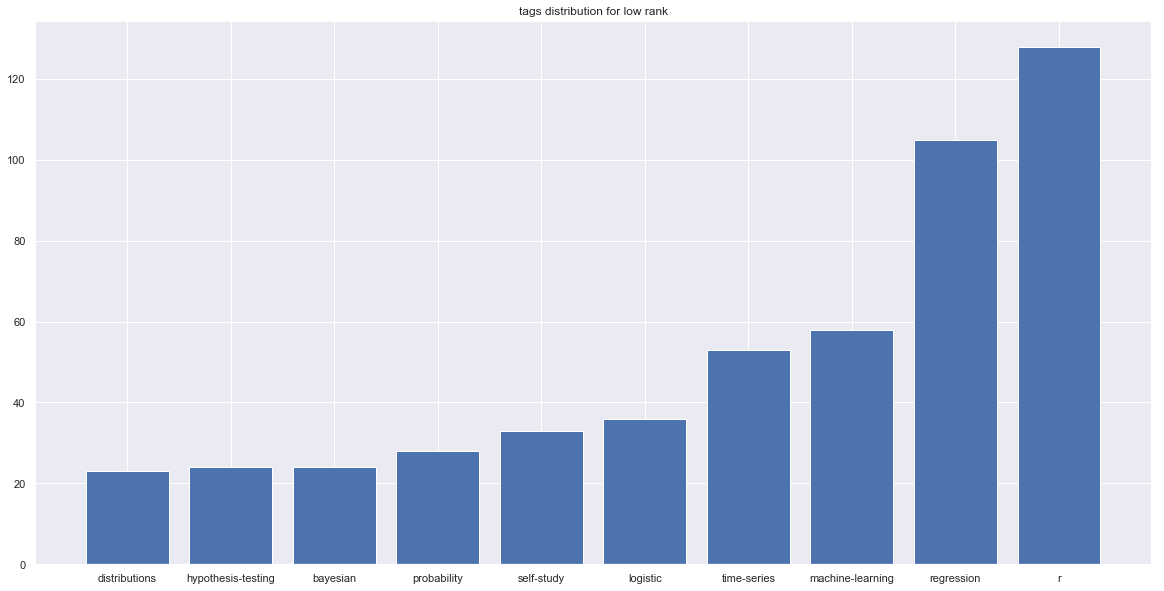

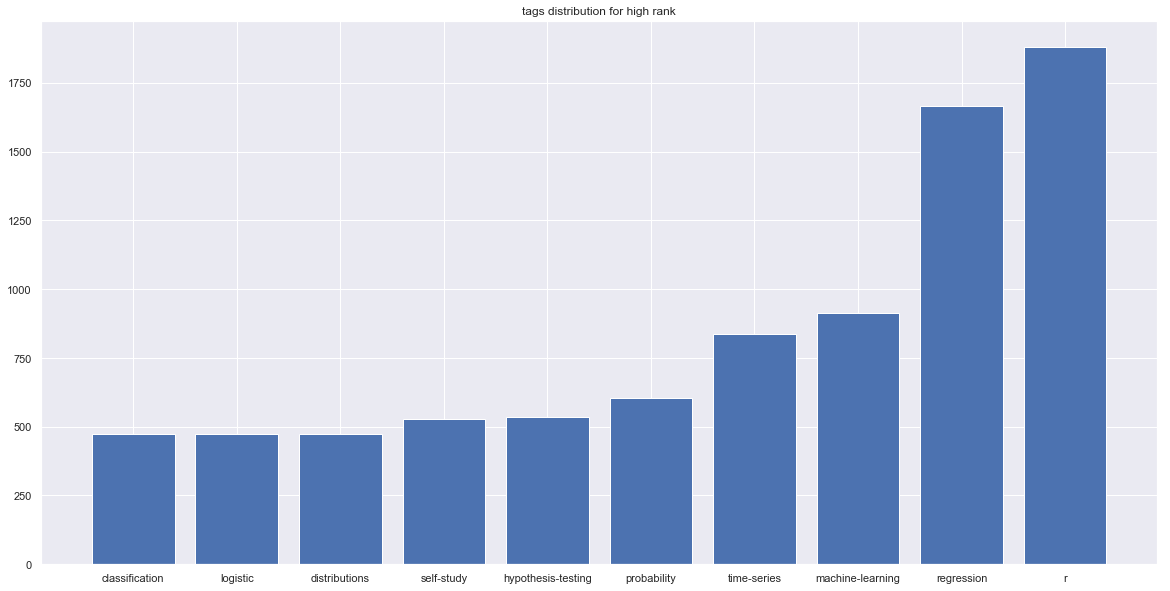

In [120]:
def to_tuple(df, col):
    return tuple(df[col].dropna().values.astype(int).tolist())

def clean_tags(tags):
    tags_clean = []
    for t in tags:
        new_list = t.split("><")
        new = [n.replace("<","").replace(">", "") for n in new_list]
        tags_clean.extend(new)
    return tags_clean

def get_tags(questions, cutoff=6):
    tags = questions["tags"].values
    tags_clean = clean_tags(tags)
    n, c = np.unique(tags_clean, return_counts=True)
    return n[c>=cutoff]

def get_most_tags(vals, num=10):
    tags = vals["tags"].values
    tags_clean = clean_tags(tags)
    uni, c = np.unique(tags_clean, return_counts=True)
    inds = np.argsort(c)
    most_often = uni[inds[-num:]]
    most_often_c = c[inds[-num:]]
    return most_often, most_often_c

def plot_tags(tags_often, counts, title):
    inds = np.arange(len(counts))
    plt.figure(figsize=(20,10))
    plt.bar(inds, counts)
    plt.xticks(inds, tags_often)
    plt.title(title)
    plt.show()

def compare_tags(vals_1, vals_2):
    tags_often, counts_often = get_most_tags(vals_1)
    plot_tags(tags_often, counts_often, "tags distribution for low rank")
    tags_hardly, counts_hardly = get_most_tags(vals_2)
    plot_tags(tags_hardly, counts_hardly, "tags distribution for high rank")
    
        
compare_tags(often_recommended_questions, hardly_recommended_questions )

In [121]:
tags_often = get_tags(often_recommended_questions, cutoff=3)
tags_hardly = get_tags(hardly_recommended_questions, cutoff = 10)
print("Tags that are in in often recommended questions but not in rest:")
for t in tags_often:
    if t not in tags_hardly:
        print(t)

Tags that are in in often recommended questions but not in rest:
filter
java


# improve readibility scores etc

In [27]:
import re
import readability

In [13]:
question_bodies = often_recommended_questions = pd.read_sql_query('''SELECT Id, body FROM Posts WHERE PostTypeId=1''', cnx)

In [30]:
def cumulative_term_entropy(text):
    """
    Computes cumulative term entropy of a question body as specified in
    section 3.3.2 in the paper
    """
    for bad_words in [".", "<", ">", "/", "\n", "?p", "'", "(", ")"]:
        text = text.replace(bad_words, "")
    text_list = text.lower().split(" ")
    word_list, word_count = np.unique(text_list, return_counts=True)
    num_words = len(word_list)
    cte = word_count * (np.log(num_words) - np.log(word_count))/num_words
    return sum(cte)

In [54]:
processed_already = os.listdir("../Baselines/data_2015/")
for userfile in os.listdir("../Baselines/data_2015_old_readability/"):
    if userfile in processed_already or userfile[0]==".":
        continue
    example = pd.read_csv("../Baselines/data_2015_old_readability/"+userfile)
    question = pd.merge(example, question_bodies, how="left", on="id")
    question["body"] = question["body"].str.replace(re.compile(r'<.*?>'), '')
    question["body"] = question["body"].str.replace(re.compile(r'(\d[\.]?)+'), '#N')
    question["body"] = question["body"].str.replace(re.compile(r'\$.*?\$'), '#M')
    question["num_words"] = question["body"].str.count(' ') + 1
    readability_measures = question["body"].apply(lambda x: readability.getmeasures(x, lang='en')['readability grades'])
    question["GunningFogIndex"] = readability_measures.apply(lambda x: x['GunningFogIndex'])
    question["LIX"] = readability_measures.apply(lambda x: x['LIX'])
    question["cumulative_term_entropy"] = question["body"].apply(lambda x: cumulative_term_entropy(x))
    question = question.drop(["body"], axis=1)
    question.to_csv("../Baselines/data_2015/"+userfile, index=False)

In [ ]:
reputation = pd.read_sql_query('''SELECT OwnerUserId, sum(upvotes) FROM Posts WHERE PostTypeId=1 GROUP BY OwnerUserId''', cnx)

In [ ]:
reputation = pd.read_sql_query('''SELECT * FROM , sum(upvotes) FROM Posts WHERE PostTypeId=1 GROUP BY OwnerUserId''', cnx)